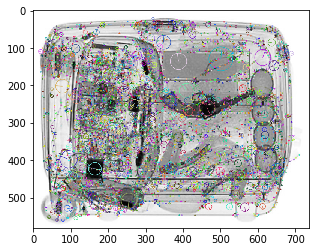

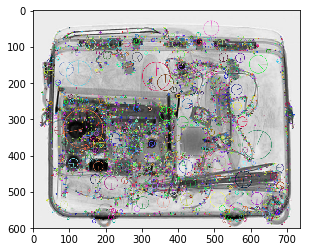

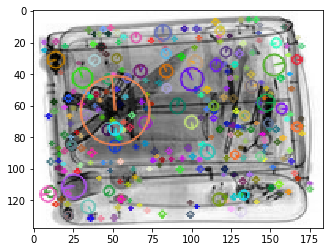

In [21]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

def get_image_paths(path):
    return glob.glob('images/*.jpg')

def show_rgb_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.CV_32S))
    plt.show()
    
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    # kp is the keypoints
    #
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy(),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
    plt.show()
    
def gen_bow_dictionary(size, descriptors):
    bow = cv2.BOWKMeansTrainer(size)
    
    for desc in descriptors:
        bow.add(desc)
    
    return bow.cluster()

def main():
    descriptors = []
    
    for path in get_image_paths('images/*.jpg'):
        image = cv2.imread(path)
        image_gray = to_gray(image)
        kp, desc = gen_sift_features(image_gray)
        descriptors.append(desc)
        show_sift_features(image_gray, image, kp)
    gen_bow_dictionary(2, descriptors)

main()
